# Playing with Parametrized Gates - Case #2

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from IPython.display import clear_output


## Objective #1: 

**Create the state given below using only one U3 gate**

$$|\psi\rangle = \frac{1}{2}|0\rangle+i\frac{\sqrt{3}}{2}|1\rangle$$

We know that:

$$
\begin{aligned}
U_3(\theta, \phi, \lambda) &= 
    \begin{bmatrix} 
        \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\
        e^{i\phi}\sin\frac{\theta}{2} & e^{i\phi+i\lambda}\cos\frac{\theta}{2}
     \end{bmatrix}
\end{aligned}
$$

If we need to create a state $$|\psi\rangle = \frac{1}{2}|0\rangle+i\frac{\sqrt{3}}{2}|1\rangle$$ that means:

$$|\psi\rangle = \begin{bmatrix}\frac{1}{2} \\ i\frac{\sqrt{3}}{2} \end{bmatrix}$$

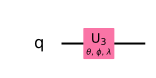

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.u3(f"$\\theta$",f"$\\phi$",f"$\\lambda$", 0)
circuit.draw('mpl')

The initial value of any qubit is $|0\rangle$, until otherwise specified.

Now we need to calculate the value of $\theta$, $\phi$ and $\lambda$ values of U3 gate to bring the input to the desired state:

$$
\begin{aligned}
    \begin{bmatrix} 
        \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\
        e^{i\phi}\sin\frac{\theta}{2} & e^{i\phi+i\lambda}\cos\frac{\theta}{2}
    \end{bmatrix} \cdot
    \begin{bmatrix} 
        1 \\
        0
    \end{bmatrix}
    &= \begin{bmatrix}
        \frac{1}{2} \\ 
        i\frac{\sqrt{3}}{2} 
    \end{bmatrix} \\
    \\
    \begin{bmatrix} 
        \cos\frac{\theta}{2} \\
        e^{i\phi}\sin\frac{\theta}{2}
    \end{bmatrix}
    &= \begin{bmatrix}
        \frac{1}{2} \\ 
        i\frac{\sqrt{3}}{2} 
    \end{bmatrix} \\
\end{aligned}    
$$

Equating individual values:

$$
\begin{aligned}
    \cos\frac{\theta}{2} &= \frac{1}{2} \\
    \frac{\theta}{2} &= \frac{\pi}{3} \\
    \theta &= \frac{2\pi}{3} \\
\end{aligned}
$$

Using the $\theta$ value in next equation:

$$
\begin{aligned}
    e^{i\phi}\sin\frac{\theta}{2} &= i\frac{\sqrt{3}}{2} \\
    e^{i\phi} \frac{\sqrt{3}}{2} &= i \frac{\sqrt{3}}{2} \\
    e^{i\phi} &= i \\
\end{aligned}
$$

We can write:

$$
\begin{aligned}
    \cos\phi + i\sin\phi &= 0 + i \\
    \cos\phi &= 0 \\
    i\sin\phi &= i \\
    \phi = \frac{\pi}{2}
\end{aligned}
$$

Since, in this case, both the terms having $\lambda$ were multiplied by 0, the value of $\lambda$ can be anything. It doesn't have any impact on the final state.

Implementing the circuit with calculated $\theta$ and $\phi$ values:

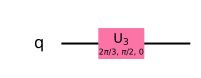

In [4]:
from numpy import pi

circuit = QuantumCircuit(1)
circuit.u3(2*pi/3, pi/2, 0, 0)
circuit.draw('mpl')

[5.00000000e-01+0.j        5.30287619e-17+0.8660254j]


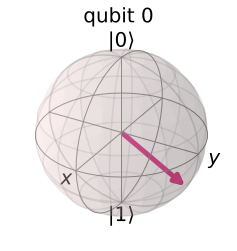

In [8]:
from qiskit import execute, Aer
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend("statevector_simulator")
job = execute(circuit,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

**Finding the probability of measuring the states:**

Probability of finding a particular output ($|x\rangle$) in a given state ($|\psi\rangle$) is given by: $|\langle x|\psi\rangle|^2$

$$
\begin{aligned}
    \langle 0|\psi\rangle &= \frac{1}{2}\langle 0|0\rangle + i \frac{\sqrt{3}}{2}\langle 0|1\rangle \\
\end{aligned}
$$

We know that, $\langle 0|0\rangle = 1$ and $\langle 0|1\rangle = 0$, so:

$$
\begin{aligned}
    \langle 0|\psi\rangle &= \frac{1}{2} \\
    |\langle 0|\psi\rangle|^2 &= \frac{1}{4} \\
    & = 0.25 \\
\end{aligned}
$$

Similarly,

$$
\begin{aligned}
    \langle 1|\psi\rangle &= \frac{1}{2}\langle 1|0\rangle + i \frac{\sqrt{3}}{2}\langle 1|1\rangle \\
    \langle 1|\psi\rangle &= i \frac{\sqrt{3}}{2} \\
    |\langle 1|\psi\rangle|^2 &= \frac{3}{4} \\
    & = 0.75 \\
\end{aligned}
$$

Now, plotting the probabilities on a histogram:

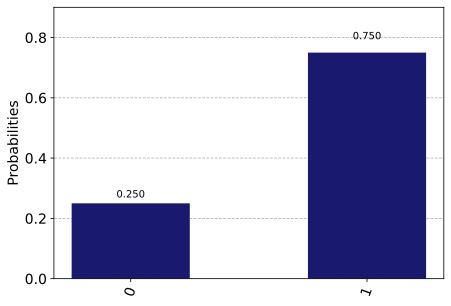

In [7]:
from qiskit.visualization import plot_histogram

results = execute(circuit,backend).result().get_counts()
plot_histogram(results, color='midnightblue')

___


## Objective #2: 

**Modify the output of `initial circuit` such that the system is transformed to $|\circlearrowright\rangle\otimes|1\rangle$  using only a single `ControlledU3` gate**

Where the state:

$$|\circlearrowright\rangle = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$$

And, the given circuit is:

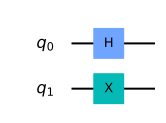

In [2]:
# initial circuit
from qiskit import QuantumCircuit
from numpy import pi

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)

circuit.draw('mpl')

 ### Solution:
 
 According to the question, we need to apply a CU3 in the given circuit to get the resultant state $|\psi\rangle = |\circlearrowright\rangle\otimes|1\rangle$. Let us first solve and see the desired state in a simplified way:
 
$$
\begin{aligned}
    |\psi\rangle &= |\circlearrowright\rangle\otimes|1\rangle \\
    &= \begin{pmatrix}
        \frac{1}{\sqrt{2}} \\
        -i \frac{1}{\sqrt{2}}
    \end{pmatrix} \otimes
    \begin{pmatrix}
        0 \\
        1
    \end{pmatrix} \\
    &= \begin{pmatrix}
        \frac{1}{\sqrt{2}} & \begin{pmatrix} 0\\ 1\end{pmatrix}\\
        -i \frac{1}{\sqrt{2}} & \begin{pmatrix} 0\\ 1\end{pmatrix}
    \end{pmatrix} \\
    &= \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        0 \\
        -i \frac{1}{\sqrt{2}}
    \end{pmatrix} \\
\end{aligned}
$$

So, this is the final column we are expected to have after applying the CU3 gate on given circuit.

Now, let's solve the given circuit. The initial state of both qubits, q0 and q1 is $|0\rangle$. After applying Hadamard gate on q0 we get:

$$
\begin{aligned}
    |q_0\rangle &= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix}\cdot \begin{pmatrix} 1\\ 0\end{pmatrix}\\
    &= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}
\end{aligned}
$$

and applying an X gate on q1 we get:

$$
\begin{aligned}
    |q_1\rangle &= \begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\cdot \begin{pmatrix} 1\\ 0\end{pmatrix}\\
    &= \begin{pmatrix} 0 \\ 1 \end{pmatrix}
\end{aligned}
$$

Getting the combined state of both qubits in the given circuit:

$$
\begin{aligned}
    |q_0 q_1\rangle &= |q_0\rangle\otimes|q_1\rangle \\
    &= \begin{pmatrix}
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}}
    \end{pmatrix} \otimes
    \begin{pmatrix}
        0 \\
        1
    \end{pmatrix} \\
    &= \begin{pmatrix}
        \frac{1}{\sqrt{2}} & \begin{pmatrix} 0\\ 1\end{pmatrix}\\
        \frac{1}{\sqrt{2}} & \begin{pmatrix} 0\\ 1\end{pmatrix}
    \end{pmatrix} \\
    &= \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        0 \\
        \frac{1}{\sqrt{2}}
    \end{pmatrix} \\
\end{aligned}
$$

**Working on the transformation:**

We know that, parametrized CU3 gate is given by the following matrix:

$$
\begin{aligned}
    CU3(\theta, \phi, \lambda)_{q0,q1} &= \begin{pmatrix}
        1 & 0                   & 0 & 0 \\
        0 & \cos\frac{\theta}{2}           & 0 & -e^{i\lambda}\sin\frac{\theta}{2} \\
        0 & 0                   & 1 & 0 \\
        0 & e^{i\phi}\sin\frac{\theta}{2}  & 0 & e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
    \end{pmatrix}
\end{aligned}
$$

Applying CU3 gate on the given circuit and equating with desired state:

$$
\begin{aligned}
    \begin{pmatrix}
        1 & 0                   & 0 & 0 \\
        0 & \cos\frac{\theta}{2}           & 0 & -e^{i\lambda}\sin\frac{\theta}{2} \\
        0 & 0                   & 1 & 0 \\
        0 & e^{i\phi}\sin\frac{\theta}{2}  & 0 & e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
    \end{pmatrix}
    \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        0 \\
        \frac{1}{\sqrt{2}}
    \end{pmatrix} 
    &= \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        0 \\
        -i \frac{1}{\sqrt{2}}
    \end{pmatrix} \\
    \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}}\cos\frac{\theta}{2}-\frac{1}{\sqrt{2}}e^{i\lambda}\sin(\frac{\theta}{2}) \\
        0 \\
        \frac{1}{\sqrt{2}}e^{i\phi}\sin\frac{\theta}{2}+\frac{1}{\sqrt{2}}e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
    \end{pmatrix} 
    &= \begin{pmatrix}
        0 \\
        \frac{1}{\sqrt{2}} \\
        0 \\
        -i \frac{1}{\sqrt{2}}
    \end{pmatrix} \\
\end{aligned}
$$

Now we have two equations:

$$
\begin{aligned}
    \frac{1}{\sqrt{2}}\cos\frac{\theta}{2}-\frac{1}{\sqrt{2}}e^{i\lambda}\sin(\frac{\theta}{2}) &= \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}}e^{i\phi}\sin\frac{\theta}{2}+\frac{1}{\sqrt{2}}e^{i(\phi+\lambda)}\cos\frac{\theta}{2} &= -i \frac{1}{\sqrt{2}}
\end{aligned}
$$

Simplifying:

$$
\begin{aligned}
    \cos\frac{\theta}{2}-e^{i\lambda}\sin(\frac{\theta}{2}) &= 1 \\
    e^{i\phi}\sin\frac{\theta}{2}+e^{i(\phi+\lambda)}\cos\frac{\theta}{2} &= -i
\end{aligned}
$$

Solving the first equation for 1, we get $\theta = 0$ or $\theta = 2\pi$.

In that case, solving second equation:

$$
e^{i(\phi+\lambda)} = -i
$$

i.e. 
$$
\cos(\phi + \lambda) + i \sin(\phi + \lambda) = -i \\
$$

Since we have only imaginary part on the RHS, LHS has to match up. So, $(\phi + \lambda)$ has to be a value that gives 0 for cos and 1 for sin. 

i.e. $(\phi + \lambda) = \frac{3\pi}{2}$ (because $\cos(\frac{3\pi}{2}) = 0$ and $\sin(\frac{3\pi}{2}) = 1$).

This gives us several possibilities for both $\phi$ and $\lambda$:

Case 1: $\phi=\frac{3\pi}{2}$ and $\lambda=0$

Case 2: $\phi=0$ and $\lambda=\frac{3\pi}{2}$

Case 3: $\phi=\pi$ and $\lambda=\frac{\pi}{2}$   

Case 4: $\phi=\frac{\pi}{2}$ and $\lambda=\pi$   

___
For $\theta = 0$:

## Case - 1:

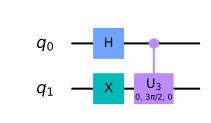

In [3]:
# transformed circuit
circuit.cu3(0,3*pi/2, 0, 0, 1)
circuit.draw('mpl')

[ 0.00000000e+00+0.j          0.00000000e+00+0.j
  7.07106781e-01+0.j         -1.29893408e-16-0.70710678j]


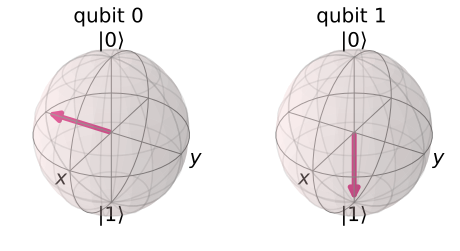

In [4]:
from qiskit import execute, Aer
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend("statevector_simulator")
job = execute(circuit,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

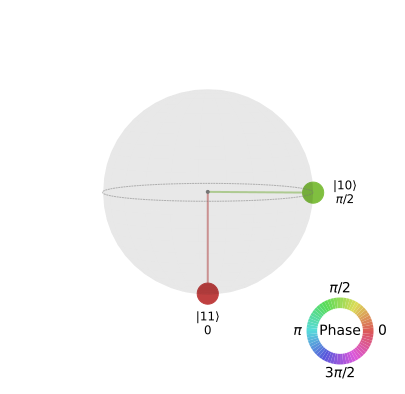

In [8]:
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('00').evolve(circuit)
plot_state_qsphere(sv.data, show_state_phases=True)

## Case - 2:

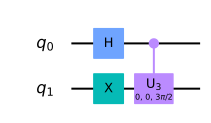

In [9]:
circuit2 = QuantumCircuit(2)
circuit2.h(0)
circuit2.x(1)
circuit2.cu3(0, 0, 3*pi/2, 0, 1)

circuit2.draw('mpl')

[ 0.00000000e+00+0.j          0.00000000e+00+0.j
  7.07106781e-01+0.j         -1.29893408e-16-0.70710678j]


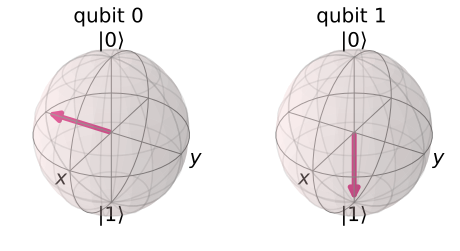

In [10]:
job = execute(circuit2,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

## Case - 3:

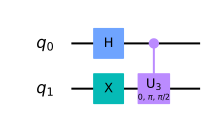

In [11]:
circuit3 = QuantumCircuit(2)
circuit3.h(0)
circuit3.x(1)
circuit3.cu3(0, pi, pi/2, 0, 1)

circuit3.draw('mpl')

[ 0.00000000e+00+0.j          0.00000000e+00+0.j
  7.07106781e-01+0.j         -1.29893408e-16-0.70710678j]


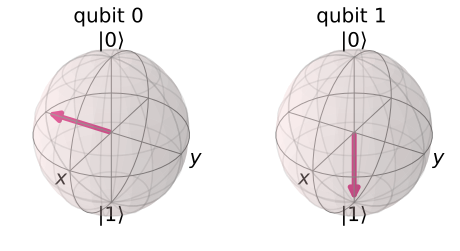

In [12]:
job = execute(circuit3,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

## Case - 4:

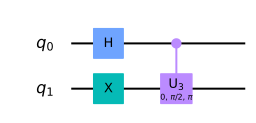

In [13]:
circuit4 = QuantumCircuit(2)
circuit4.h(0)
circuit4.x(1)
circuit4.cu3(0, pi/2, pi, 0, 1)

circuit4.draw('mpl')

[ 0.00000000e+00+0.j          0.00000000e+00+0.j
  7.07106781e-01+0.j         -1.29893408e-16-0.70710678j]


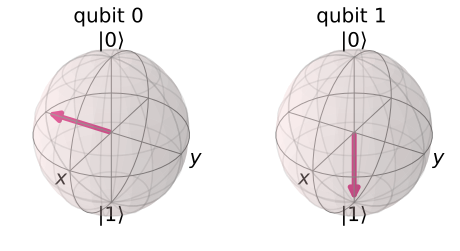

In [14]:
job = execute(circuit4,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

___

In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.21.0'}

# Thank You

--Pragya Katyayan.